# SUMMARY:
 - homework assignment from BEE 3600 Molecular and Cellular Bioengineering - Spring of 2023
 - explored how to model different cellular reaction pathways and communications from differential equations

# POSSIBLE IMPROVEMENTS
 - most of this was "fill in the blank"...it could have been more demanding but it demonstrates knowledge of the subject and adaption to code
 
 # ---------------------------------------------
# HW5 I1-FFL and multi-input multi-gate loop

Created by: Canal Li, Cao Lu, Ethan Kosco

Last updated by: Canal Li on 2023-3-2


<center><strong>Logical facial hair :) </strong></center>
<center>
    <img src="joke.jpg" width="370px" />
</center>

# Part 1 Written HW (50 points)

### <span style="color:red"> For this part, submit your response (neatly and clearly) to gradescope.

1) Why do cells take advantage of temporal programs? <strong>[5 points]</strong>

2) What are the two types of temporal programs? Describe an instance of when a cell would utilize each program. <strong>[8 points]</strong>

3) Draw the LIFO plot with X as the signaling plot and 3 Z output proteins. Be sure to also include the “circle and arrow” diagram as well. Be as detailed as possible in your plots, including the dotted lines/thresholds. <strong>[8 points]</strong>

4) How would the FIFO plot change if its “circle and arrow” plot was modified as shown below. Draw the “new” plot. Is it still a FIFO temporal program? Why or why not? <strong>[8 points]</strong>
<center>
    <img src="ANDOR.png" width="600px" />
</center>
<center><strong>
*Note: the plot will be different than the one shown below, but please keep the same threshold order (i.e. in your “X” plot, Kxy should be the lowest threshold, Kxz1 should be the middle, and Kxz2 should be the highest).
   </strong> </center>
   
5) Consider the dense overlapping regulon shown below. Assume AND gate logic at the output layer.
<center>
    <img src="DOR1.png" width="300px" />
</center>
Calculate a logic table for it. <strong>[21 points]</strong>
<center>
    <img src="DOR2.png" width="800px" />
</center>


# Part 2 Coding HW (50 points)

## <span style="color:red"> Exact Solution vs Numerical Method </span>

Before we proceed, go back to your HW7, and try to run following code at the last part of persistence detection (this is not graded, just for better understanding). Note that you can add another cell by choosing <span style="color:blue">Insert->Add Cell Below</span>, or you can single-click leftside of the last cell of HW7 and click B in your keyboard.   

#### Noted that in the code snippet above, I only changed when the first ON&OFF are set. 
If your correctly implemented your code in HW7, you should get these two plots.
<p>
<center>
    <img src="wrong_FFL.png" width="370px" />
</center>
These figures are different??!! How? <br>
Actually, the exact solution is showing the wrong answer while the numerical solution is right.You can also reason this simply from your bio-intuition.
It turns out, there is nothing wrong with my code (golden rule), nor is the equations of exact solutions of C1-FFL you learnt in lecture were wrong. So what is wrong?<p> 
The reason that the exact solution is showing something so weird is that when we designed the code for persistence detector, <strong>we meant it to be a persistence detector</strong>. What does this mean? It means that when we designed the ON and OFF for your HW7, we knew that we wanted to show you persistence detector and that the first ON of $S_X$ will not affect the second ON (whereas here, you can see that $X$ never reached 0 concerntration after it has been expressed.) When we wrote the code for exact solution, we didn't consider this situation.<p>
So what should we do? Modify the exact solution to consider more situations? This will only complicate your code and make it even more difficult to debug. You will probably find out in your later career, <strong><span style="color:red"> numerical simulation is often more reliable </strong>. While exact solution is the translation of solved ODEs into codes, if the system is complicated (here $X$ is turned OFF, but turned ON before it reached 0 concerntration), you need to calcuate time-points (like WHEN $X$ reaches $k_{xy}$) that depends on so many other parameters. In numerical solution, you don't need to worry about this: all you are doing is translating the ODEs (not their solutions) into code. In other words, your are sacrificing negligible precision for sanity. <p>
In this homework, we deal with exact solution only, simply because we are dealing with more complicated systems.

## Import packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## I1-FFL (20 points)

Here, you are asked to reuse some of the codes from the numerical solution for persistence detector, to create the plot for the <span style="color:red">Incoherent Type-1 FFL</span>. In contrast with your lecture notes, we will have two ON&OFF period, just like in the persistence detector of HW7. 
Recall from lecture that I1-FFL is defined as:
$$\frac{dX}{dt} = \beta_X \theta ( S_{x} \text{ is present)} -\alpha_X X$$
$$\frac{dY}{dt} = \beta_Y \theta ( X>K_{XY}) -\alpha_Y Y$$
And there are three ODEs for $Z$:<p>
When    $X>K_{XZ}\text{ AND } Y <= K_{YZ}$
$$\frac{dZ}{dt} = \beta_Z -\alpha_Z Z $$ 
When    $X>K_{XZ}\text{ AND } Y > K_{YZ}$
$$\frac{dZ}{dt} = \beta_{leaky} -\alpha_Z Z $$
When  $X<= K_{XZ}\text{ AND } Y <= K_{YZ}$
$$\frac{dZ}{dt} = -\alpha_Z Z $$

Unlike in HW7, the parameters ($\alpha$ and $\beta$) are not the same for $X,Y,Z$, and please pay extra attention to ODEs of $Z$ under different conditions. 

In [8]:
def I1(beta_x=0.5, beta_y=0.5, beta_z=0.75, beta_leaky = 0.1,
       alpha_x=0.25, alpha_y=0.2, alpha_z=0.25,
       kxy=1.0, kxz=0.5, kyz=1.0, on1=0, off1=15, on2=20, off2=40):
    """
    The numerical solution for I1-FFL
    INPUT:
        parameters of the I1-FFL
    OUPUT:
        sx,x,y,z - the exact values of these concentrations that varies with time t
    """
    t = np.linspace(-5, 45, 1000)
    sx,x,y,z = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))

    # Sx
    # Let Sx to be turned on at on1, turned off at off1
    # And then turned on at on2 again and turned off at off2 again
    for i in range(len(t)):
        if t[i] > on1 and t[i] <= off1:
            sx[i] = 1
        if t[i] > on2 and t[i] <= off2:
            sx[i] = 1
    
    ## calculate the time step Delta t (dt)
    dt = (45+5)/1000
    #############################<GRADED>##########################################    

    # Righthand side of differential equation
    # f(X) = dX/dt = beta*theta(X>K)-alpha*X
    # Note that theta function is implicitly expressed as an if-else clause
    def f_x(x, i):
        if sx[i] == 1:
            return beta_x - alpha_x *x
        else:
            return - alpha_x *x
    
    # Integrate the differential equation using Euler’s method
    # Refer back to the notes above
    for i in range(len(t)):
        x[i] = x[i-1] + f_x(x[i-1], i-1)*dt
    


    #Y
    def f_y(y, i): 
        ##Fill in your solution
        if x[i] >= kxy:
            return beta_y - alpha_y *y
        else:
            return - alpha_y *y        
        
    for i in range(len(t)):
        y[i] = y[i-1] + f_y(y[i-1], i-1)*dt


    #Z
    def f_z(z, i):
        ##Fill in your solution
        if x[i] > kxz and y[i] <= kyz:
            return beta_z - alpha_z *z
        elif x[i] > kxz and y[i] > kyz:
            return beta_leaky - alpha_z *z
        else:
            return - alpha_z *z
        
    for i in range(len(t)):    
        ##Fill in your solution
        z[i] = z[i-1] + f_z(z[i-1], i-1)*dt
    
    
    #############################<GRADED>###########################################
    
    return sx,x,y,z

In [9]:
# The fuction for plotting the I1-FFL with Sx, X, Y and Z
def plot_I1(sx, x, y, z, title, kxy = 1.0, kxz = 0.5, kyz = 1.0):
    t = np.linspace(-5, 45, 1000)
    kxys = np.full(len(t), kxy)
    kxzs = np.full(len(t), kxz)
    kyzs = np.full(len(t), kyz)
    plt.figure()
    plt.subplot(411, xticks=[], yticks=[])
    plt.plot(t, sx)
    plt.ylabel("S_x")
    plt.title(title)
    
    plt.subplot(412, xticks=[], yticks=[])
    plt.plot(t, x, label="X")
    plt.plot(t, kxys, 'r--', label="Kxy")
    plt.plot(t, kxzs, 'm--', label="Kxz")
    plt.ylabel("X")
    plt.legend(loc="best")
    
    plt.subplot(413, xticks=[], yticks=[])
    plt.plot(t, y, label="Y")
    plt.plot(t, kyzs, 'g--', label="Kyz")
    plt.ylabel("Y")
    plt.legend(loc="best")
    
    plt.subplot(414, xticks=[], yticks=[])
    plt.plot(t, z, label="Z")
    plt.xlabel("t")
    plt.ylabel("Z")
    plt.legend(loc="best")
    
    plt.show()

Now, you can plot the figure and see for yourself! If your answer is correct, you should get the same figures. __What conclusion can you drawn from the first plot?__ The second plot is exactly the same as the plot of I1-FFL in lecture, note how the parameters of I1 are changed so that $S_X$ is only turned ON once.
<center>
    <img src="I1FFL.png" width="400px" />
<center>
    
<span style="color:blue">THIS IS YOUR TEST CASE</span>

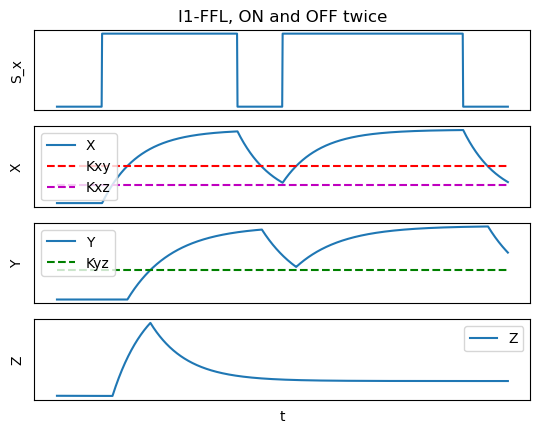

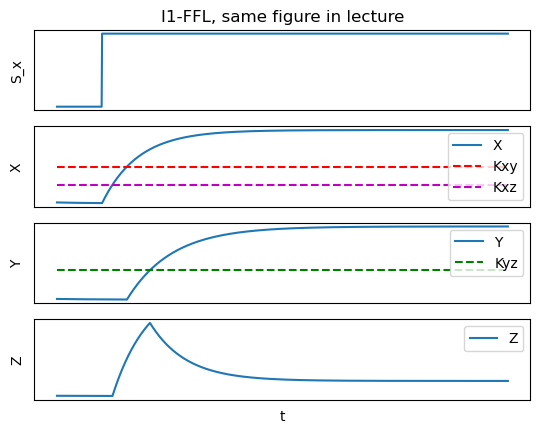

In [10]:
sx,x,y,z = I1()
plot_I1(sx, x, y, z, "I1-FFL, ON and OFF twice")
sx,x,y,z = I1(on1=0,off1=0,on2=0,off2=45)
plot_I1(sx, x, y, z, "I1-FFL, same figure in lecture")

## Multi-input multi-gate loop (30 points)

Here you are asked to implement the numerical solution of a complicated system. We will not provide the test case for you, make sure that your solution is correct yourself (this is what usually happens in the wild).
<blockquote>
    <center>
    <img src="multiple input multiple AND OR.png" width="400px" />
    </center>
      <p><cite><center>A complicated node subgraph with 2 inputs and AND and OR gates<br>
      </center></cite></p>
</blockquote>

In [13]:
def complicated(alpha_x1=0.25, alpha_x2=0.25, alpha_y=0.2, alpha_z=0.25,
                beta_x1=0.5, beta_x2=0.5, beta_y=0.5, beta_z=0.75,
                kx1y = 1.2, kx2y = 0.3, kx1z = 0.75, kyz  = 0.6,
                on1=0, off1=40, on2=15, off2=25):
    """
    The numerical solution for the complicated node subgraph above
    INPUT:
        parameters of the system
    OUPUT:
        sx1,sx2,x1,x2,y,z - the exact values of these concentrations that varies with time t
    """
    t = np.linspace(-5, 45, 1000)
    sx1,sx2,x1,x2,y,z = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)),np.zeros(len(t)), np.zeros(len(t))

    # Sx
    # Unlike before, on1 and off1 control sx1 and on2 and off2 control sx2
    for i in range(len(t)):
        if t[i] > on1 and t[i] <= off1:
            sx1[i] = 1
        if t[i] > on2 and t[i] <= off2:
            sx2[i] = 1
    
    ## calculate the time step Delta t (dt)
    dt = (45+5)/1000
    
    #############################<GRADED>##########################################    
   
    
    #X1
    def f_x1(x1, i):
        if sx1[i] == 1:
            return beta_x1 - alpha_x1 *x1
        else:
            return - alpha_x1 *x1
    
    #Integrate the differential equation using Euler’s method
    for i in range(len(t)):
        x1[i] = x1[i-1] + f_x1(x1[i-1], i-1)*dt
        

    #X2
    def f_x2(x2, i):
        if sx2[i] == 1:
            return beta_x2 - alpha_x2 *x2
        else:
            return - alpha_x2 *x2
    
    #Integrate the differential equation using Euler’s method
    for i in range(len(t)):
        x2[i] = x2[i-1] + f_x2(x2[i-1], i-1)*dt
    


    #Y
    def f_y(y, i): 
        ##Fill in your solution
        if x1[i] > kx1y and x2[i] > kx2y:
            return beta_y - alpha_y *y
        else:
            return - alpha_y *y  
        
    #Integrate the differential equation using Euler’s method    
    for i in range(len(t)):
        y[i] = y[i-1] + f_y(y[i-1], i-1)*dt


    #Z
    def f_z(z, i):
        ##Fill in your solution
        if x1[i] > kx1z or y[i] >= kyz:
            return beta_z - alpha_z *z
        else:
            return - alpha_z *z
    
    #Integrate the differential equation using Euler’s method
    for i in range(len(t)):    
        ##Fill in your solution
        z[i] = z[i-1] + f_z(z[i-1], i-1)*dt
     
    
    #############################<GRADED>###########################################
    
    return sx1,sx2,x1,x2,y,z 

In [16]:
# The fuction for plotting the complicated system with Sx1, Sx2, X1, X2, Y and Z
def plot_complicated(sx1, sx2, x1, x2, y, z, title, kx1y = 1.2, kx2y = 0.5, kx1z = 0.75, kyz  = 0.25):
    t = np.linspace(-5, 45, 1000)
    kx1ys, kx2ys, kx1zs, kyzs = np.full(len(t), kx1y), np.full(len(t), kx2y), np.full(len(t), kx1z), np.full(len(t), kyz)
    plt.figure()
    plt.subplot(611, xticks=[], yticks=[])
    plt.plot(t, sx1)
    plt.ylabel("S_x1")
    plt.title(title)
    
    plt.subplot(612, xticks=[], yticks=[])
    plt.plot(t, sx2)
    plt.ylabel("S_x2")

    plt.subplot(613, xticks=[], yticks=[])
    plt.plot(t, x1)
    plt.plot(t, kx1ys, 'r--', label="kx1y")
    plt.plot(t, kx1zs, 'm--', label="kx1zs")
    plt.ylabel("X1")
    plt.legend(loc="best")

    plt.subplot(614, xticks=[], yticks=[])
    plt.plot(t, x2)
    plt.plot(t, kx2ys, 'g--', label="kx2y")
    plt.ylabel("X2")
    plt.legend(loc="best")


    plt.subplot(615, xticks=[], yticks=[])
    plt.plot(t, y)
    plt.plot(t, kyzs, 'y--', label="Kyz")
    plt.ylabel("Y")
    plt.legend(loc="best")


    plt.subplot(616, xticks=[], yticks=[])
    plt.plot(t, z)
    plt.ylabel("Z")

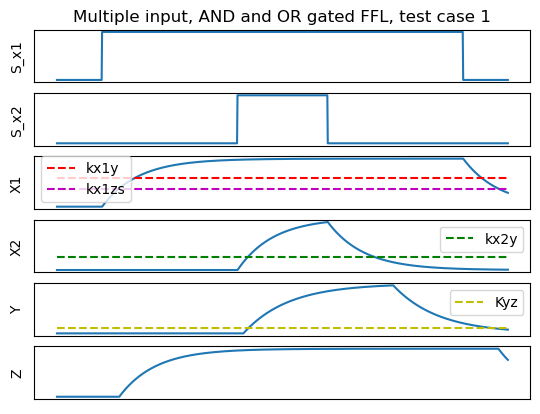

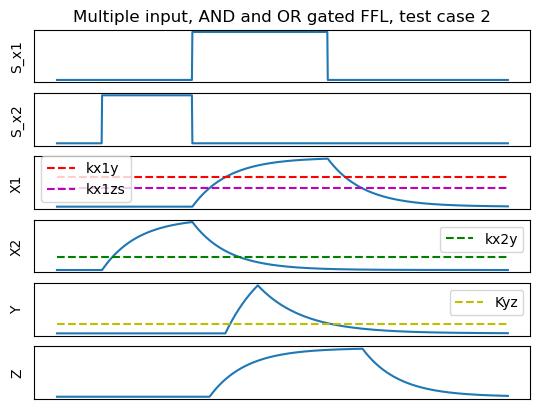

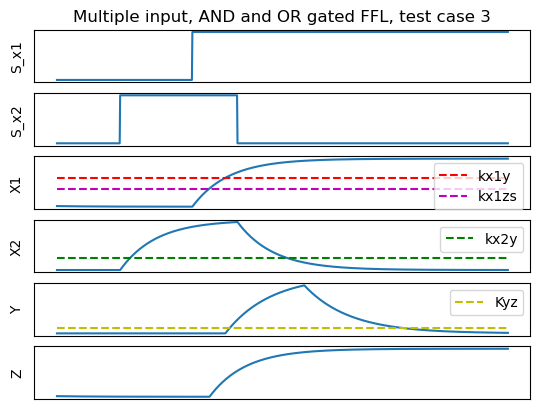

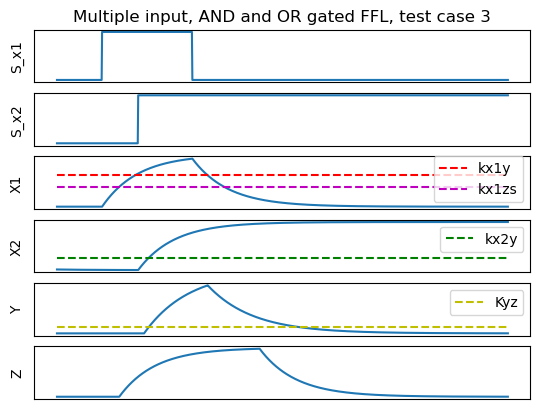

In [17]:
#Hidden test cases
sx1,sx2,x1,x2,y,z  = complicated()
plot_complicated(sx1, sx2, x1, x2, y, z, "Multiple input, AND and OR gated FFL, test case 1")
sx1,sx2,x1,x2,y,z  = complicated(on1=10, off1=25, on2=0, off2=10)
plot_complicated(sx1, sx2, x1, x2, y, z, "Multiple input, AND and OR gated FFL, test case 2")
sx1,sx2,x1,x2,y,z  = complicated(on1=10, off1=45, on2=2, off2=15)
plot_complicated(sx1, sx2, x1, x2, y, z, "Multiple input, AND and OR gated FFL, test case 3")
sx1,sx2,x1,x2,y,z  = complicated(on1=0, off1=10, on2=4, off2=45)
plot_complicated(sx1, sx2, x1, x2, y, z, "Multiple input, AND and OR gated FFL, test case 3")
